In [1]:
# Imports
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from nn.nn import NeuralNetwork
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Datasets
digits = load_digits()
X = digits.data
y = digits.target

In [3]:
# Splitting data into training and validation sets 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

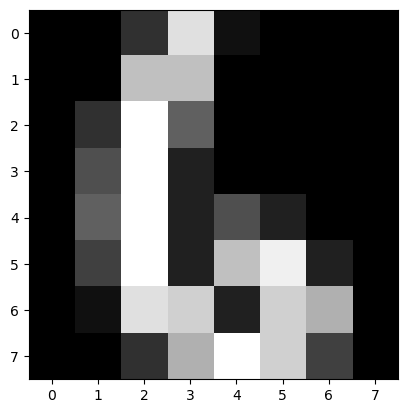

[[ 0.  0.  3. 14.  1.  0.  0.  0.]
 [ 0.  0. 12. 12.  0.  0.  0.  0.]
 [ 0.  3. 16.  6.  0.  0.  0.  0.]
 [ 0.  5. 16.  2.  0.  0.  0.  0.]
 [ 0.  6. 16.  2.  5.  2.  0.  0.]
 [ 0.  4. 16.  2. 12. 15.  2.  0.]
 [ 0.  1. 14. 13.  2. 13. 11.  0.]
 [ 0.  0.  3. 11. 16. 13.  4.  0.]]


In [4]:
# Visualizing a digit
plt.imshow(X_train[0].reshape(8, 8), cmap="gray")
plt.show()
print(X_train[0].reshape(8, 8))

In [5]:
# Shapes of inputs and labels
print("Shape of training inputs is:", X_train.shape)
print("Shape of training set labels is:", y_train.shape)

print("Shape of test inputs is:", X_val.shape)
print("Shape of test set labels is:", y_val.shape)

Shape of training inputs is: (1437, 64)
Shape of training set labels is: (1437,)
Shape of test inputs is: (360, 64)
Shape of test set labels is: (360,)


In [6]:
# Defining the architecture for autoencoder

autoencoder_architecture = [
    {'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},
    {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}
]

# Define hyperparameters
learning_rate = 0.001
random_seed = 42
epochs = 50
batch_size = 10
loss_function = 'mean_squared_error'
#loss_function = 'binary_cross_entropy'

# Create an instance of NeuralNetwork for the autoencoder
autoencoder = NeuralNetwork(
    nn_arch=autoencoder_architecture,
    lr=learning_rate,
    seed=random_seed,
    batch_size=batch_size,
    epochs=epochs,
    loss_function=loss_function
)

In [7]:
# Train the autoencoder
per_epoch_loss_train, per_epoch_loss_val = autoencoder.fit(X_train, y_train, X_val, y_val)



In [8]:
# Plot your training and validation loss by epoch.
fig = go.Figure()

# Add training loss trace
fig.add_trace(go.Scatter(x=np.arange(1, len(per_epoch_loss_train)+1), y=per_epoch_loss_train, mode='lines', name='Training Loss'))

# Add validation loss trace
fig.add_trace(go.Scatter(x=np.arange(1, len(per_epoch_loss_val)+1), y=per_epoch_loss_val, mode='lines', name='Validation Loss'))

# Update layout
fig.update_layout(title='Training and Validation Loss',
                   xaxis_title='Epoch',
                   yaxis_title='Loss',
                   legend=dict(x=0, y=1),
                   margin=dict(l=0, r=0, t=40, b=0))

# Show plot
fig.show()


In [9]:
# Quantify your average reconstruction error over the validation set.
Reconstructed_val = autoencoder.predict(X_val)
print("Average Validation Error: ", autoencoder._mean_squared_error(X_val, Reconstructed_val))


Average Validation Error:  42.58862558450318


# Troubleshooting

For some reason my validation reconstruction is pretty poor. I tried troubleshooting to figure out the source of this madness. Given the time constraints, I could not figure it out. If I had more time, I would try to create a smaller dataset and go through my implementation to figure out the bug.  

# Explain why you chose the hyperparameter values you did.

# Hyperparameters selection reasoning 
Hyperparameters were manually tuned to find best setting.

# learning_rate = 0.001
It is small so that I am not overshooting during optimization.
It also large enough for a lower Training and Validation loss in a lower number of epochs. 

# random_seed = 42
42 because it is the answer to the ultimate questions of life
Also, for reproducability I guess. 

# epochs = 50
Based empirically on monitoring the Training and Validation Loss curves over epoch. 
Allowed for stabilization of Loss near 2 without significant overfitting to the Training Set

# batch_size = 10
Led to faster convergence and lower Training and Validation Loss

# loss_function = 'mean_squared_error'
Chosen because the the objective is not a binary classification task. 

# ReLu 
was chosen because it seemed to perform better and is often used in computer vision tasks. 

